In [1]:
%run my_functions.ipynb

### SAT Problem 1

f(x0,x1,x2) = (x0 OR x1 OR x2 OR x3) AND (~x0 OR x1 OR x2 OR ~x3)

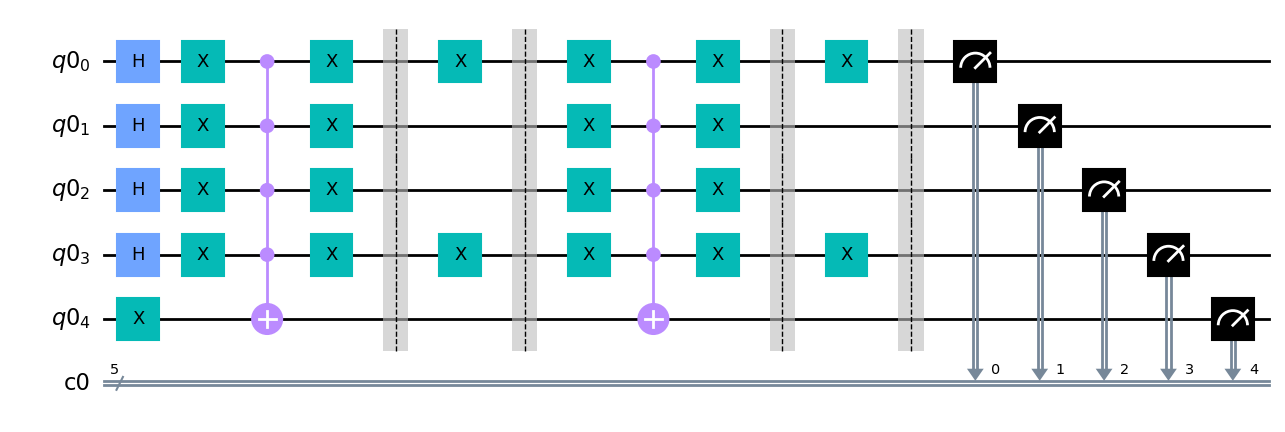

In [2]:
qr = QuantumRegister(5)
cr = ClassicalRegister(5)
qc = QuantumCircuit(qr,cr)

#Creating superposition of entire search space
qc.h(range(4))

#Oracle 1
#Implementing clause 1 (Logical OR operation)
qc.x(qr[:])
qc.mct([qr[0],qr[1],qr[2],qr[3]],qr[-1])
qc.x(qr[0:4])
qc.barrier()


#Implementing clause 2
positive_var = [1,2]
negative_var = [0,3]

#negating the variables
qc.x(qr[i] for i in negative_var)
qc.barrier()

#Oracle 2
#Logical OR operation
qc.x(qr[0:4])
qc.mct([qr[i] for i in range(4)],qr[[-1]])
qc.x(qr[0:4])
qc.barrier()

#Bringing the negated variables to original form
qc.x(qr[i] for i in negative_var)
qc.barrier()
     
qc.measure(qr[:],cr[:])
qc.draw('mpl')


In [3]:
sim = Aer.get_backend('statevector_simulator')
output_state = execute(qc,sim).result().get_statevector()
print(output_state)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2, 2, 2, 2))


## Heuristic Grover's Search

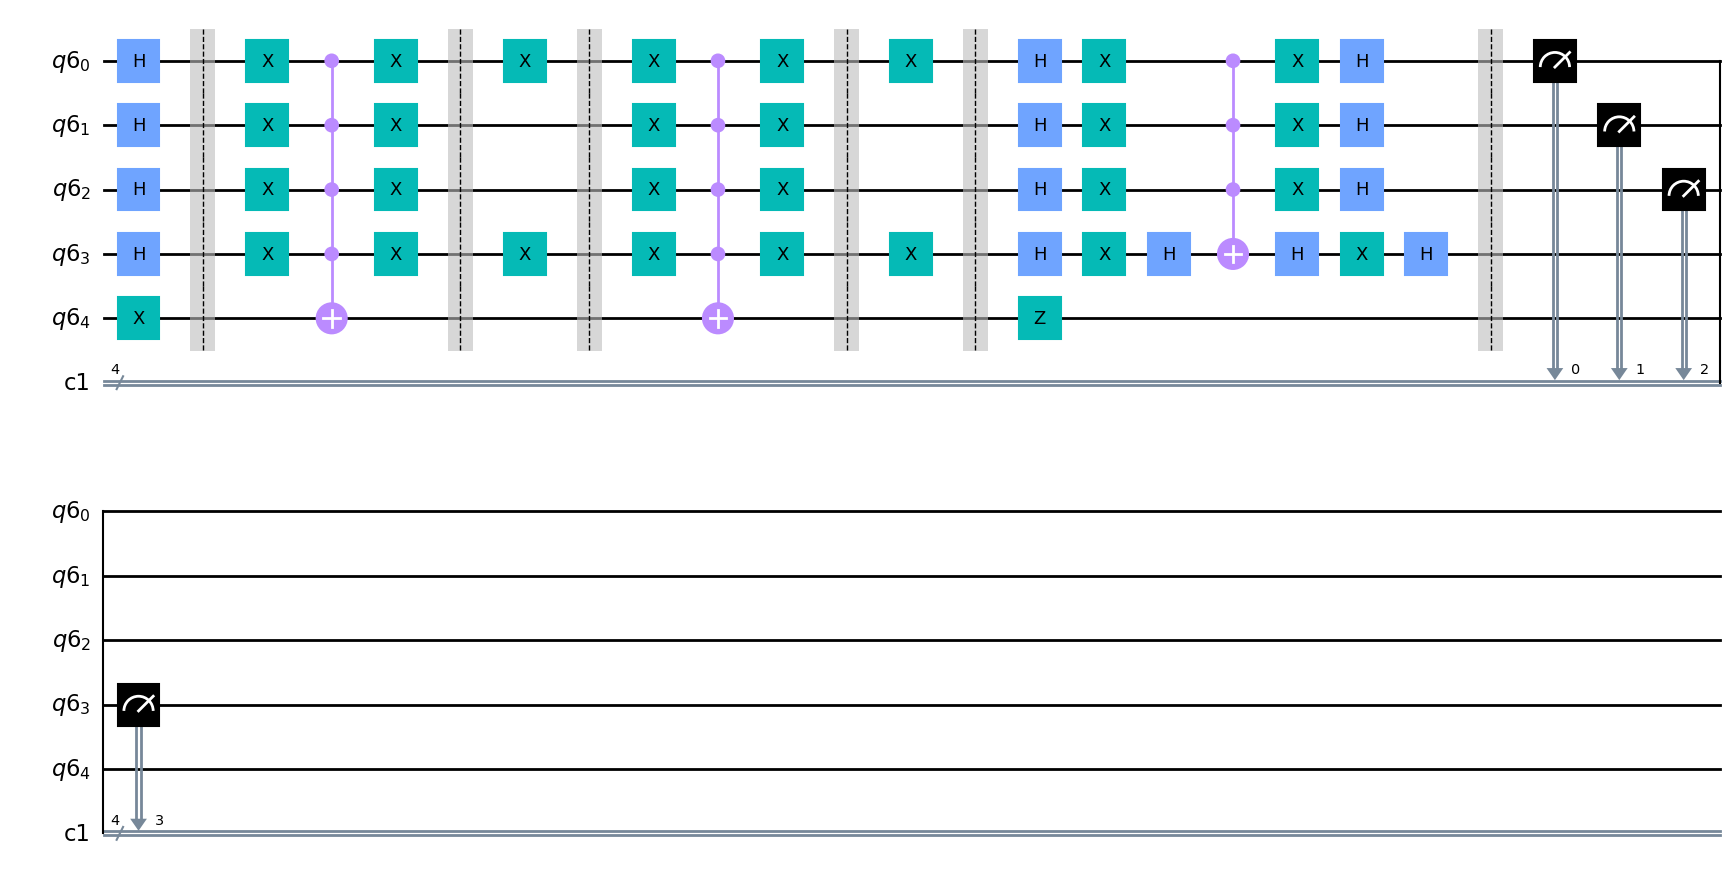

In [4]:
clause1 = [1,2,3,4]
clause2  =[-1,2,3,-4]

qr = QuantumRegister(5)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr,cr)
qc.h(qr[:4])
qc.x(qr[-1])
#qc.h(qr[-1])
qc.barrier()

encode_clause(clause1,qc,qr)
encode_clause(clause2,qc,qr)

qc.z(qr[-1])

qc.h(qr[:-1])
qc.x(qr[:-1])
qc.h(qr[-2])
qc.mct([qr[i] for i in range(len(clause1)-1)],qr[[-2]])
qc.h(qr[-2])
qc.x(qr[:-1])
qc.h(qr[:-1])
qc.barrier()
qc.measure(qr[:4],cr[:4])

qc.draw('mpl')

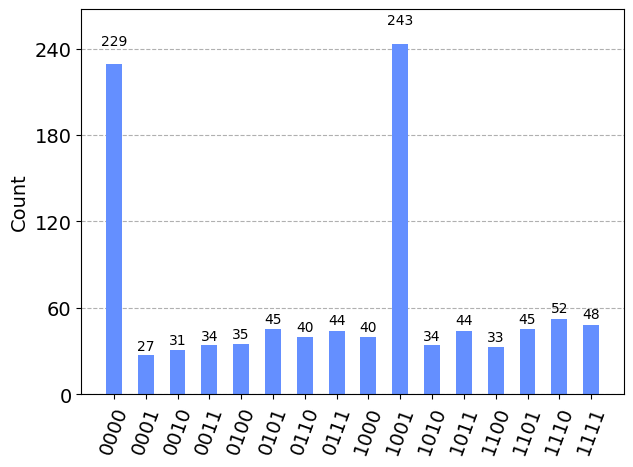

In [5]:
result = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(result)

1. The above sat problem has more solutions (more marked expressions than unmarked ones). Thus the Grover's search algorithm ends up finding the unmarked solution with more probability.
2. Also, since I am using ancilla qubit to mark the solutions, it doesnt matter if the ancillary qubit value is 1 or 0. All that matters is the boolean value of other qubits of the highest probable solution.

NOTE : One way to resolve the issue in point 1, is by disgarding the highest probable solutions obtained using the grover's algorithm. The solution of such SAT problems would then be  = (All possible solutions in the search space) - (Highest probable solutions obtained using the above approach) 

In [6]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.25.1', 'qiskit': '0.44.1', 'qiskit-aer': '0.12.2', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': '0.7.0'}